In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings

%matplotlib inline

warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

# No need for an open connection, 
# because you're only doing a single query
engine.dispose()

1. Deal with missing variables.

2. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

3. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.

4. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable.

5. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

6. Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?

7. If your variable of interest is the budget deficit variable, which method do you think is the most appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question?
Answer the following questions as you complete this challenge, and then submit a link to your Notebook. 

In [4]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [ ]:
#fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
#             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
#             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
#             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
#             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
#             "GRADES_9_12_G", "GRADES_ALL_G"]
#
#states = education_df["STATE"].unique()
#
#for state in states:
#    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()
#
## we drop the null values after interpolation
#education_df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [74]:
# finding percentages of missing values
df.isnull().sum()*100/df.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

In [59]:
# backfill missing enrollment values
df['ENROLL'] = df['ENROLL'].fillna(method='ffill')

In [61]:
# forwardfill missing enrollment values
df['ENROLL'] = df['ENROLL'].fillna(method='bfill')

In [20]:
#dropping YEAR 2017 as values are missing except for 4 average values
df.drop(df[df['YEAR'] == 2017].index, inplace=True)

In [65]:
df.groupby('YEAR').agg({'OTHER_EXPENDITURE':'median'})

,OTHER_EXPENDITURE
YEAR,
1992,143312.0
1993,143312.0
1994,150749.0
1995,204052.0
1996,212389.0
1997,226505.0
1998,240608.0
1999,245363.0
2000,260900.0


In [64]:
# replacing Other Expenditure missing values for 1992 with 1993 median
df['OTHER_EXPENDITURE'].fillna(value = 143312.0,inplace=True)

In [56]:
# Dropping states with <= value counts <=23

# dropped_states = ['PUERTO_RICO', 'VIRGIN_ISLANDS','AMERICAN_SAMOA','NORTHERN_MARIANAS','DOD_DOMESTIC','DOD_OVERSEAS'
# ,'BUREAU_OF_INDIAN_AFFAIRS','BI','DD','NORTHERN_MARIANA_ISLANDS','COMMONWEALTH_OF_MARIANAS','DOD_-_OVERSEAS','BIE'
# ,'DOD_-_DOMESTIC','BUREAU_OF_INDIAN_EDUCATION','MARIANAS','DEPARTMENT_OF_DEFENSE','DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY'
# ,'AS','GU','PR','DOD','DOD_-_FOREIGN','DOD_(OVERSEAS_AND_DOMESTIC_COMBINED)','VI','MP','BUREAU_OF_INDIAN_EDUCATIO','U.S._VIRGIN_ISLANDS']                          1

df.drop(df[df['STATE'] == 'BUREAU_OF_INDIAN_EDUCATIO'].index, inplace=True)

In [73]:
df.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

In [57]:
df.STATE.value_counts()

DISTRICT_OF_COLUMBIA    28
VIRGINIA                27
MASSACHUSETTS           25
ILLINOIS                25
MINNESOTA               25
ALABAMA                 25
UTAH                    25
CONNECTICUT             25
IOWA                    25
RHODE_ISLAND            25
ALASKA                  25
NORTH_CAROLINA          25
SOUTH_DAKOTA            25
LOUISIANA               25
KENTUCKY                25
FLORIDA                 25
MICHIGAN                25
WEST_VIRGINIA           25
CALIFORNIA              25
VERMONT                 25
GEORGIA                 25
NEW_JERSEY              25
IDAHO                   25
NEVADA                  25
MONTANA                 25
OHIO                    25
OKLAHOMA                25
TENNESSEE               25
DELAWARE                25
NORTH_DAKOTA            25
OREGON                  25
COLORADO                25
ARIZONA                 25
INDIANA                 25
MISSOURI                25
NEW_MEXICO              25
TEXAS                   25
N

In [68]:
# interpolating grades columns
df["GRADES_PK_G"] = df["GRADES_PK_G"].interpolate(method='ffill')
df["GRADES_KG_G"] = df["GRADES_KG_G"].interpolate(method='ffill')
df["GRADES_4_G"] = df["GRADES_4_G"].interpolate(method='ffill')
df["GRADES_8_G"] = df["GRADES_8_G"].interpolate(method='ffill')
df["GRADES_12_G"] = df["GRADES_12_G"].interpolate(method='ffill')
df["GRADES_1_8_G"] = df["GRADES_1_8_G"].interpolate(method='ffill')
df["GRADES_9_12_G"] = df["GRADES_9_12_G"].interpolate(method='ffill')
df["GRADES_ALL_G"] = df["GRADES_ALL_G"].interpolate(method='ffill')

In [72]:
# interpolating average grades columns
#df["AVG_MATH_4_SCORE"] = df["AVG_MATH_4_SCORE"].interpolate(method='ffill')
#df["AVG_MATH_8_SCORE"] = df["AVG_MATH_8_SCORE"].interpolate(method='ffill')
#df["AVG_READING_4_SCORE"] = df["AVG_READING_4_SCORE"].interpolate(method='ffill')
df["AVG_READING_8_SCORE"] = df["AVG_READING_8_SCORE"].interpolate(method='ffill')

2. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

ANSWER#: By boxplots and Tukey's methods both variables have outliers.

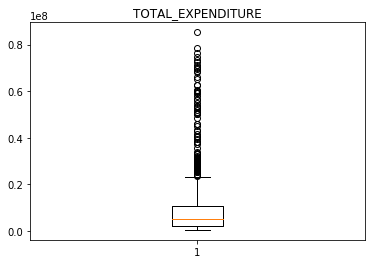

In [76]:
plt.boxplot(df['TOTAL_EXPENDITURE'])
plt.title('TOTAL_EXPENDITURE')
plt.show()

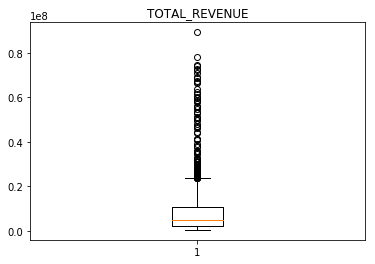

In [75]:
plt.boxplot(df['TOTAL_REVENUE'])
plt.title('TOTAL_REVENUE')
plt.show()

In [77]:
# NumPy's `percentile()` method returns the 
# values of the given percentiles. In this case,
# give `75` and `25` as parameters, which corresponds 
# to the third and the first quartiles.
q75, q25 = np.percentile(df["TOTAL_EXPENDITURE"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df["TOTAL_EXPENDITURE"] > max_val) 
                      | (df["TOTAL_EXPENDITURE"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 152
The score threshold is: 1.5
Number of outliers is: 111
The score threshold is: 2.0
Number of outliers is: 80
The score threshold is: 2.5
Number of outliers is: 55
The score threshold is: 3.0
Number of outliers is: 49
The score threshold is: 3.5
Number of outliers is: 43
The score threshold is: 4.0
Number of outliers is: 39
The score threshold is: 4.5
Number of outliers is: 35


In [78]:
# NumPy's `percentile()` method returns the 
# values of the given percentiles. In this case,
# give `75` and `25` as parameters, which corresponds 
# to the third and the first quartiles.
q75, q25 = np.percentile(df["TOTAL_REVENUE"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df["TOTAL_REVENUE"] > max_val) 
                      | (df["TOTAL_REVENUE"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 146
The score threshold is: 1.5
Number of outliers is: 110
The score threshold is: 2.0
Number of outliers is: 74
The score threshold is: 2.5
Number of outliers is: 52
The score threshold is: 3.0
Number of outliers is: 45
The score threshold is: 3.5
Number of outliers is: 40
The score threshold is: 4.0
Number of outliers is: 37
The score threshold is: 4.5
Number of outliers is: 32


3. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.

ANSWER:  After applying a log transform to both variables, the data is normally distributed and without outliers.

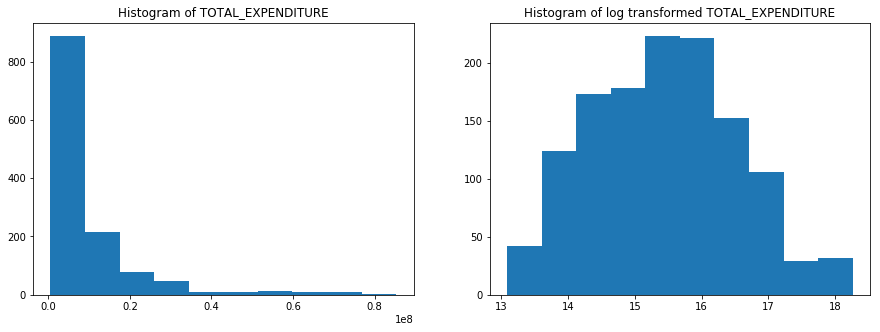

In [83]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(df["TOTAL_EXPENDITURE"])
plt.title("Histogram of TOTAL_EXPENDITURE")

plt.subplot(1,2,2)
plt.hist(np.log(df["TOTAL_EXPENDITURE"]))
plt.title("Histogram of log transformed TOTAL_EXPENDITURE")
plt.show()

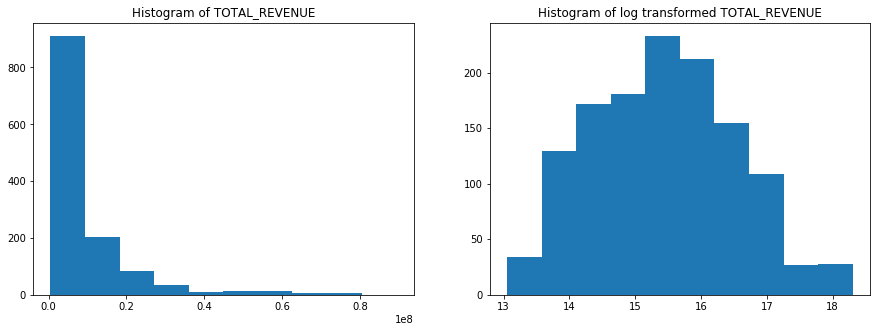

In [84]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(df["TOTAL_REVENUE"])
plt.title("Histogram of TOTAL_REVENUE")

plt.subplot(1,2,2)
plt.hist(np.log(df["TOTAL_REVENUE"]))
plt.title("Histogram of log transformed TOTAL_REVENUE")
plt.show()

In [85]:
# Take the log of TOTAL_EXPENDITURE and calculate
# the quartiles accordingly.
q75, q25 = np.percentile(np.log(df["TOTAL_EXPENDITURE"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(df["TOTAL_EXPENDITURE"]) > max_val) 
                      | (np.log(df["TOTAL_EXPENDITURE"]) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 28
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [86]:
# Take the log of TOTAL_REVENUE and calculate
# the quartiles accordingly.
q75, q25 = np.percentile(np.log(df["TOTAL_REVENUE"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(df["TOTAL_REVENUE"]) > max_val) 
                      | (np.log(df["TOTAL_REVENUE"]) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 25
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


4. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable.

ANSWER:  Subtracting TE from TR before eliminating outliers created outliers on both ends reflecting the many deficits.

In [97]:
df['deficit_with_outliers']= df['TOTAL_REVENUE'] - df['TOTAL_EXPENDITURE']

Text(0.5,1,'Histogram of deficit_with_outliers')

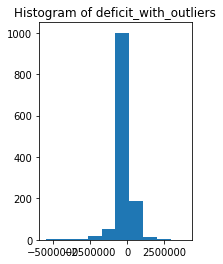

In [98]:
plt.subplot(1,2,1)

plt.hist(df["deficit_with_outliers"])
plt.title("Histogram of deficit_with_outliers")

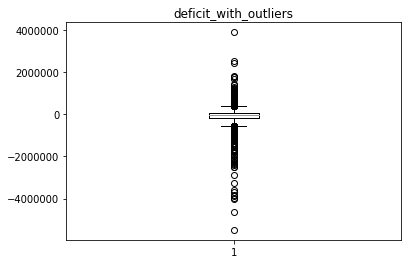

In [99]:
plt.boxplot(df['deficit_with_outliers'])
plt.title('deficit_with_outliers')
plt.show()

In [108]:
# Take the log of the deficit_with_outliers and calculate
# the quartiles accordingly.
q75, q25 = np.percentile(np.log(df["deficit_with_outliers"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(df["deficit_with_outliers"]) > max_val) 
                      | (np.log(df["deficit_with_outliers"]) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


5. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

ANSWER: Subtracting TE from TR even after removing outliers created outliers reflecting many states deficits but there are less outliers.

In [100]:
df['deficit_without_outliers']= np.log(df['TOTAL_REVENUE']) - np.log(df['TOTAL_EXPENDITURE'])

Text(0.5,1,'Histogram of deficit_without_outliers')

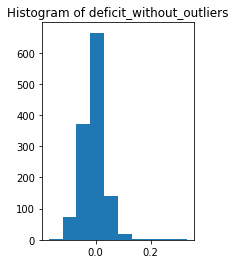

In [101]:
plt.subplot(1,2,1)
plt.hist(df["deficit_without_outliers"])
plt.title("Histogram of deficit_without_outliers")

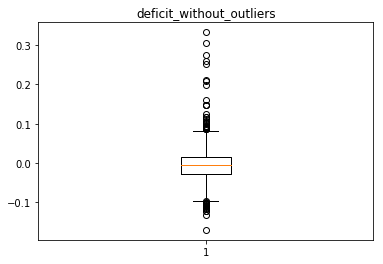

In [102]:
plt.boxplot(df['deficit_without_outliers'])
plt.title('deficit_without_outliers')
plt.show()

In [104]:
# Take the log of the deficit_without_outliers and calculate
# the quartiles accordingly.
q75, q25 = np.percentile(np.log(df["deficit_without_outliers"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(df["deficit_without_outliers"]) > max_val) 
                      | (np.log(df["deficit_without_outliers"]) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


5. Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?
ANSWER:  Removing outliers and then subtracting greatly reduced the variability or spread of the deficit variable. It increased the mean and std to near zero.

6.  If your variable of interest is the budget deficit variable, which method do you think is the most appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question?

ANSWER: According to Tukey's method, neither produced outliers at minimun thresholds = 1 so I would likely use deficit with outliers as it would help to increase interpretability. 

In [106]:
df.deficit_with_outliers.describe()

count    1.280000e+03
mean    -1.045990e+05
std      5.734045e+05
min     -5.487742e+06
25%     -1.816858e+05
50%     -2.148400e+04
75%      5.130425e+04
max      3.897129e+06
Name: deficit_with_outliers, dtype: float64

In [105]:
df.deficit_without_outliers.describe()

count    1280.000000
mean       -0.005898
std         0.044045
min        -0.170369
25%        -0.029241
50%        -0.006391
75%         0.015571
max         0.332627
Name: deficit_without_outliers, dtype: float64